# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Рыбка Семён Олегович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

{('A', 'B'): Text(0.654508476093664, 0.47552828417802706, '3'),
 ('A', 'C'): Text(0.09549147175227024, 0.2938926307527015, '1'),
 ('B', 'C'): Text(-0.25000005215406573, 0.7694209149307285, '9'),
 ('B', 'E'): Text(0.3090170266931363, 2.980232327587373e-08, '7'),
 ('C', 'D'): Text(-0.8090170266931362, -2.980232327587373e-08, '1'),
 ('C', 'E'): Text(-0.24999997764825752, -0.18163562362300228, '2'),
 ('D', 'B'): Text(-0.25000002235174246, 0.18163562362300228, '2'),
 ('D', 'E'): Text(-0.24999994784593424, -0.7694209149307285, '1'),
 ('E', 'A'): Text(0.6545085505994722, -0.4755282543757038, '8')}

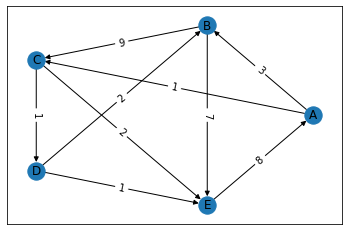

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import time
G = nx.DiGraph()
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
file = "C:\\Users\\lenovo\\OneDrive\\Рабочий стол\\СиАОД\\Lab6\\matr_smej.txt"
def read_matr(G, fileName):
    with open(fileName,"r", encoding="utf-8") as file:
        matr = file.read()
    i = 0
    node = ord('A')
    while node <= ord('E'):
        k = ord('A')
        while i < len(matr) and matr[i]!='\n':
            if matr[i]==' ':
                i+=1
                continue
            if matr[i] == '0':
                i += 1
                k += 1
                continue
            elif matr[i]=='-' or int(matr[i])!=0:
                j = i
                while matr[j] != ' ' and matr[j] != '\n':
                    j += 1
                G.add_edge(chr(node), chr(k), weight = int(matr[i:j]))
                i = j
                k += 1
        node += 1
        i += 1
    return G

G = read_matr(G, file)
pos = nx.circular_layout(G)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

In [2]:
def show_graph(G, dictionary):
    for i in dictionary:
        print("Путь:", i)
        print("Длина пути:", dictionary.get(i))
        edges = []
        for j in range(len(i)-1):
            p = (i[j], i[j+1])
            edges.append(p)
        pos = nx.circular_layout(G)
        weights = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx(G, pos=pos)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="r", width=3)
        plt.show()

Путь: ('A', 'C', 'E')
Длина пути: 3


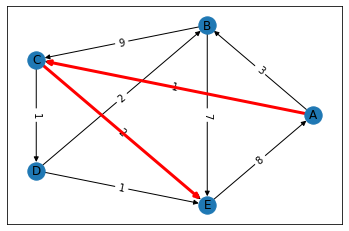

In [3]:
def dijkstra(Graph, start, sink):
    path = []
    copyGraph = Graph.copy()
    node = start
    nodes = nx.nodes(copyGraph)
    leng_to_others = {}
    for i in nodes:
        leng_to_others[i]= float('inf')  
    leng_to_others[start] = 0
    search_leng_to_others = leng_to_others.copy()
    while node != sink:
        list_neighbors = nx.edges(copyGraph, node)
        for edges in list_neighbors:
            weight = copyGraph.edges[node,edges[1]]['weight']
            leng_to_others[edges[1]]=min(leng_to_others[edges[1]], weight+leng_to_others.get(node))
            search_leng_to_others[edges[1]]=min(search_leng_to_others[edges[1]], weight)
        copyGraph.remove_node(node)
        search_leng_to_others.pop(node)
        min_leng = min(search_leng_to_others.values())
        for k, v in search_leng_to_others.items():
            if v == min_leng:
                node = k
                
    while node != start:
        list_neighbors = Graph.in_edges(node)
        for edges in list_neighbors:
            weight = Graph.edges[edges[0],node]['weight']
            if leng_to_others.get(node) - weight == leng_to_others.get(edges[0]):
                path.insert(0, node)
                node = edges[0]
                break
    path.insert(0, node)
    
    dictionary = {}
    dictionary[tuple(path)] = leng_to_others.get(sink)
    
    return dictionary

dictionary = dijkstra(G, 'A', 'E')
show_graph(G, dictionary)

Путь: ('A', 'C', 'E')
Длина пути: 3


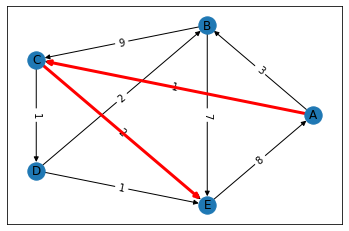

In [10]:
def floyd_warshall(Graph, start, sink):
    nodes = nx.nodes(Graph)
    leng = len(nodes)
    dist = [[float('inf') for i in range(leng)] for j in range(leng)]
    next_node = [[None for i in range(leng)] for j in range(leng)]
    for node in nodes:
        list_neighbors = nx.edges(Graph, node)
        for edges in list_neighbors:
            weight = Graph.edges[node,edges[1]]['weight']
            dist[abs(ord('A') - ord(node))][abs(ord('A') - ord(edges[1]))] = weight
            next_node[abs(ord('A') - ord(node))][abs(ord('A') - ord(edges[1]))] = edges[1]
    for k in range(leng):
        for i in range(leng): 
            for j in range(leng):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]
                   
    path = []
    node = start
    while node != sink:
        path.append(node)
        node = next_node[ord(node)-ord('A')][ord(sink)-ord('A')]
    path.append(node)
    
    dictionary = {}
    dictionary[tuple(path)] = dist[ord(start)-ord('A')][ord(sink)-ord('A')]
    
    return dictionary
dictionary = floyd_warshall(G, 'A', 'E')
show_graph(G, dictionary)

Путь: ('A', 'C', 'E')
Длина пути: 3


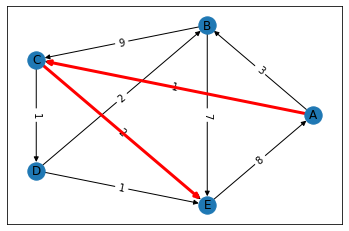

In [11]:
def bellmanFord(Graph, start, sink):
    dist = [float("inf")] * len(nx.nodes(Graph)) 
    dist[ord(start)-ord('A')] = 0
    graph = Graph.edges.data("weight")
    prev = [-1]*len(nx.nodes(Graph)) 
    while True:
        check = False       
        for u, v, w in graph:
            if dist[ord(u)-ord('A')] != float("inf") and dist[ord(u)-ord('A')] + w < dist[ord(v)-ord('A')]: 
                dist[ord(v)-ord('A')] = dist[ord(u)-ord('A')] + w
                prev[ord(v)-ord('A')] = u
                check = True
        if not check:
            break
    path = []
    node = sink
    path.insert(0, node)
    while node != start:
        node = prev[ord(node)-ord('A')]
        path.insert(0, node)
    dictionary = {}
    dictionary[tuple(path)] = dist[ord(sink)-ord('A')]
    
    return dictionary
dictionary = bellmanFord(G, 'A', 'E')
show_graph(G, dictionary)

Путь: ('A', 'C', 'E')
Длина пути: 3


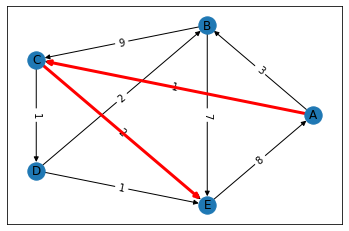

In [12]:
def johnson(Graph, start, sink):
    copyGraph = Graph.copy()
    copyGraph.add_node('S')
    for node in nx.nodes(copyGraph):
        if node == 'S':
            continue
        copyGraph.add_edge('S', node, weight=0)        
    _, h = nx.bellman_ford_predecessor_and_distance(copyGraph, 'S')
    copyGraph.remove_node('S')
    for edges in copyGraph.edges.data("weight"):
        weight = edges[2] + h[edges[0]] - h[edges[1]]
        copyGraph[edges[0]][edges[1]]['weight'] = weight
    
    path = nx.dijkstra_path(copyGraph, start, sink)
    weight = 0
    for i in range(len(path)-1):
        weight += Graph[path[i]][path[i+1]]['weight']
    dictionary = {}
    dictionary[tuple(path)] = weight
    
    return dictionary

dictionary = johnson(G, 'A', 'E')
show_graph(G, dictionary)

Путь: ('A', 'C', 'E')
Длина пути: 3


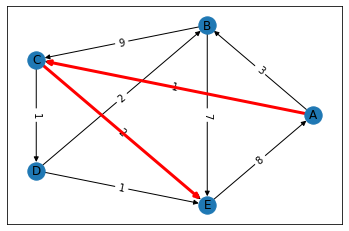

In [13]:
def levit(Graph, start, sink):
    nodes = list(nx.nodes(Graph))
    M0 = []
    M1_1 = []
    M1_2 = []
    M2 = []
    dist = [float('inf')]*len(nodes)
    prev = [-1]*len(nodes)
    dist[nodes.index(start)]=0
    M1_1.append(start)
    for i in nodes:
        if i==start:
            continue
        M2.append(i)
    while len(M0) != len(nodes):
        if M1_2 != []:
            node = M1_2.pop(0)
        else:
            node = M1_1.pop(0)
        list_neighbors = Graph.out_edges(node)
        for edges in list_neighbors:
            if edges[1] in M2:
                M2.pop(M2.index(edges[1]))
                M1_1.append(edges[1])
                dist[nodes.index(edges[1])] = dist[nodes.index(node)] + Graph[node][edges[1]]['weight']
                prev[nodes.index(edges[1])] = node
            elif edges[1] in M1_1:
                weight = dist[nodes.index(node)] + Graph[node][edges[1]]['weight']
                if dist[nodes.index(edges[1])] > weight:
                    dist[nodes.index(edges[1])] = weight
                    prev[nodes.index(edges[1])] = node
            elif edges[1] in M0:
                weight = dist[nodes.index(node)] + Graph[node][edges[1]]['weight']
                if dist[nodes.index(edges[1])] > weight:
                    dist[nodes.index(edges[1])] = weight
                    prev[nodes.index(edges[1])] = node
                    M0.pop(M0.index(edges[1]))
                    M1_2.append(edges[1])
        
        M0.append(node)
    
    path = []
    node = sink
    path.insert(0, node)
    while node != start:
        node = prev[ord(node)-ord('A')]
        path.insert(0, node)
    
    dictionary = {}
    dictionary[tuple(path)] = dist[ord(sink)-ord('A')]
    
    return dictionary           

dictionary = levit(G, 'A', 'E')
show_graph(G, dictionary)

Путь: ('A', 'C', 'E')
Длина пути: 3


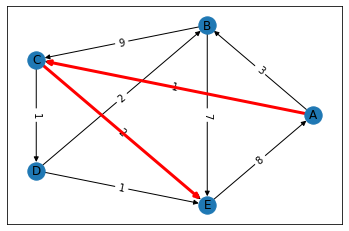

Путь: ('A', 'C', 'D', 'E')
Длина пути: 3


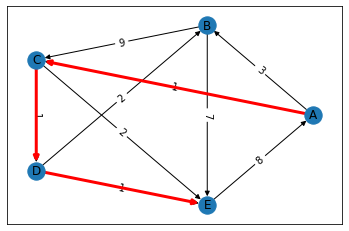

Путь: ('A', 'B', 'E')
Длина пути: 10


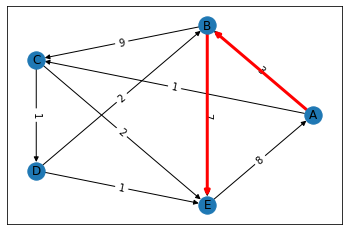

Путь: ('A', 'C', 'D', 'B', 'E')
Длина пути: 11


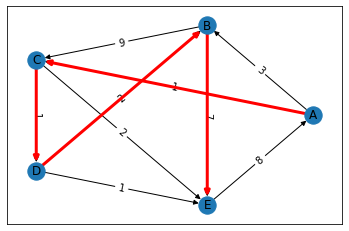

Путь: ('A', 'B', 'C', 'E')
Длина пути: 14


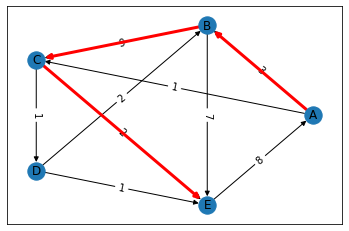

Путь: ('A', 'B', 'C', 'D', 'E')
Длина пути: 14


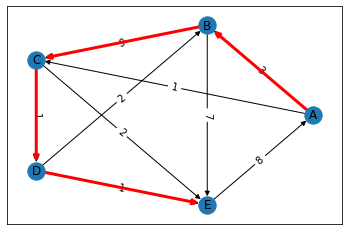

--- 1531 ms ---


In [14]:
def yenKSP(Graph, start, sink, k):
    paths = []
    paths_leng = []
    paths.append(nx.shortest_path(Graph, source=start, target=sink, weight='weight'))
    paths_leng.append(nx.shortest_path_length(Graph, source=start, target=sink, weight='weight'))
    candidates = []
    candidates_leng = []
    for K in range(1, k):
        for j in range(len(paths[K-1])-1):
            root_path = []
            root_leng = 0
            copyGraph = Graph.copy()
            if j > 0:
                m = 0
                while m <= j-1:
                    root_path.append(paths[K-1][m])
                    root_leng += copyGraph.edges[paths[K-1][m],paths[K-1][m+1]]['weight']
                    copyGraph.remove_node(paths[K-1][m])
                    m += 1
            copyGraph.remove_edge(paths[K-1][j], paths[K-1][j+1])
            try:
                spur_path = nx.shortest_path(copyGraph, source=paths[K-1][j], target=sink, weight='weight')
                spur_leng = nx.shortest_path_length(copyGraph, source=paths[K-1][j], target=sink, weight='weight')
            except nx.NetworkXNoPath:
                spur_path = []
                spur_leng = 0
            if spur_path == []:
                continue
            total_path = []
            total_path.extend(root_path)
            total_path.extend(spur_path)
            total_leng = root_leng + spur_leng
            try:
                index = candidates.index(total_path)
            except ValueError:
                index = -1
            if index == -1:
                candidates.append(total_path)
                candidates_leng.append(total_leng)
        
        min_leng = min(candidates_leng)
        index = candidates_leng.index(min_leng)
        index_check = 0
        while index_check!=-1:
            try:
                index_check = paths.index(candidates[index])
            except ValueError:
                index_check = -1
            if index_check != -1:
                candidates.pop(index)
                candidates_leng.pop(index)
                min_leng = min(candidates_leng)
                index = candidates_leng.index(min_leng)
        paths.append(candidates[index])
        paths_leng.append(candidates_leng[index])
        candidates.pop(index)
        candidates_leng.pop(index)
    
    path_k = {}
    for i in range(len(paths)):
        path_k[tuple(paths[i])] = paths_leng[i]
    
    return path_k

start_time = time.time()
dictionary = yenKSP(G, 'A', 'E', 6)
show_graph(G, dictionary)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

### Вывод